In [2]:
# import modules needed
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# use sickle to trim off the low quanlity reads
# ! sickle se -f untreated1_chr4.fq -t sanger -o untreated_chr4_sickle.fq

In [ ]:
# use trimfq to trim off the low quanlity reads
# ! seqtk trimfq untreated1_chr4.fq > untreated1_chr4_trimfq.fq

### The goal here is to write a simple parser to extract quanlity information from fastq files
Here I am using mouse chr4 seq data as an example

In [16]:
# open the data
original = open('untreated1_chr4.fq', 'r')
sickle = open('untreated_chr4_sickle.fq', 'r')
trimfq = open('untreated1_chr4_trimfq.fq', 'r')

In [3]:
# def a function to calculate the mean quanlity per read
def mean_quanlity(score):
    temp_score_list = [ord(i) for i in score]
    # to calculate the Sanger score Illumina
    m = sum(temp_score_list) / len(temp_score_list) - 33
    return m

In [4]:
# def function to calculate the mean quanlity for a file
def parse_general_quanlity_info(fastq_data):
    data = fastq_data.readlines()
    quanlity_list = data[3: len(data): 4]
    quanlity_list = [i.split('\n')[0] for i in quanlity_list]
    mean_quanlity_list = [mean_quanlity(i) for i in quanlity_list]
    return mean_quanlity_list

In [5]:
original_quanlity = parse_general_quanlity_info(original)
sickle_quanlity = parse_general_quanlity_info(sickle)
trimfq_quanlity = parse_general_quanlity_info(trimfq)

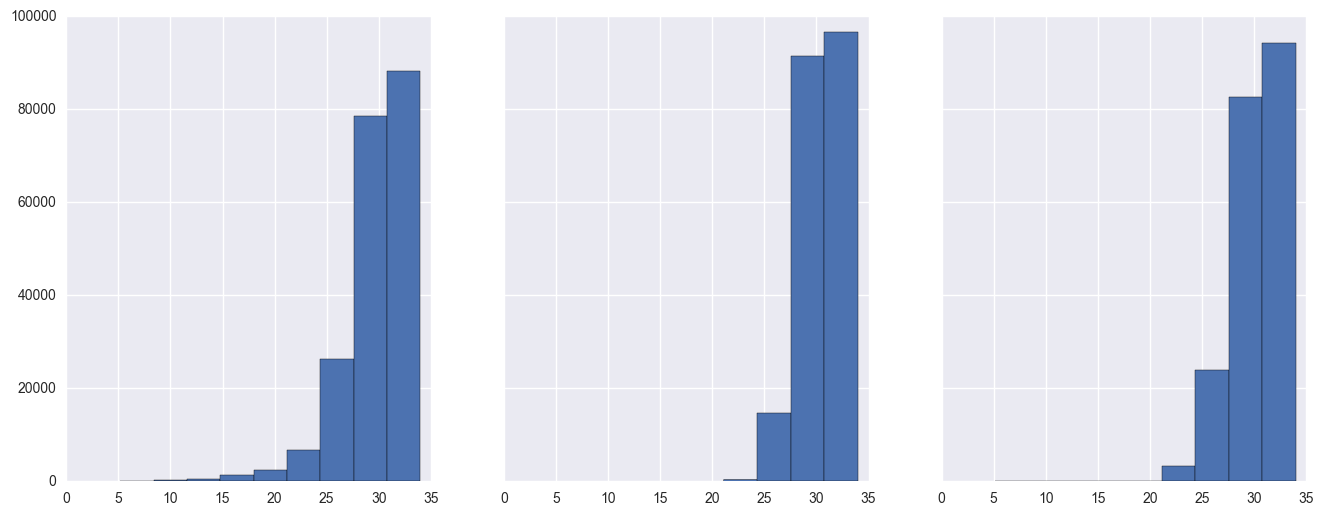

In [9]:
# Clearly, after trimming, most scores > 20
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6), sharex=True, sharey=True,)
ax1.hist(original_quanlity, bins=10)
ax2.hist(sickle_quanlity, bins=4)
ax3.hist(trimfq_quanlity, bins=10)

plt.show()

### The goal below is to write a simple parser to mimic one function in a well-known tool called FastQC
### Plot out the position based quanlity
### Common sense suggests that score will decrease as the reading extends, thus, higher position, lower score

In [3]:
# the function that is used to parse the position based quanlity info
def parse_position_based_quanlity_info(fastq_data):
    data = fastq_data.readlines()
    quanlity_list = data[3: len(data): 4]
    quanlity_list = [i.split('\n')[0] for i in quanlity_list]
    reads_quanlity = []
    for read in quanlity_list:
        read = [ord(i) - 33 for i in read]
        reads_quanlity.append(read)
    return reads_quanlity

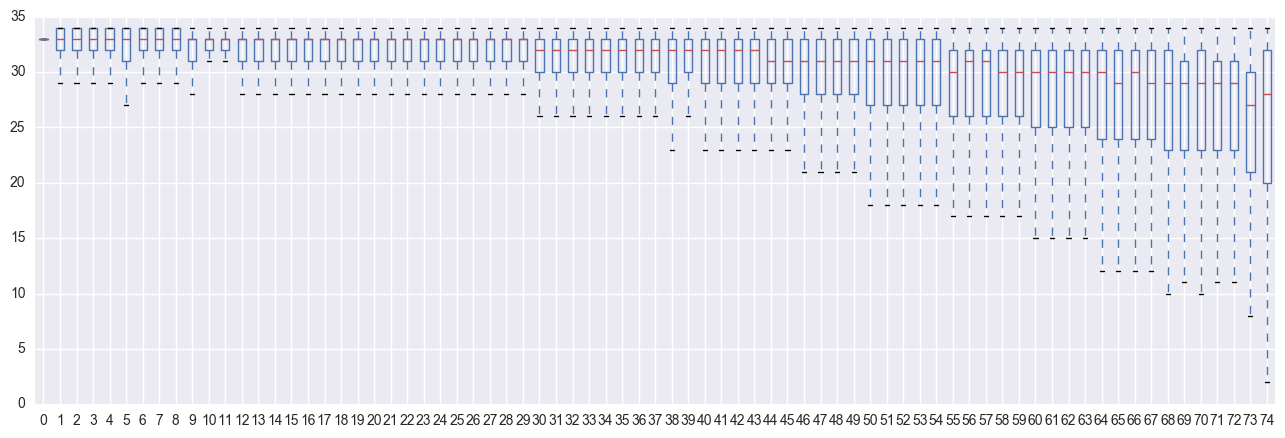

In [17]:
# fastest way to plot out the result is to use pandas to construct a dataframe, and box plot the dataframe
temp = np.array(parse_position_based_quanlity_info(original))
df.plot(kind = 'box', figsize=(16, 5))

### Let's compare the result with FastQC result, exactly the same

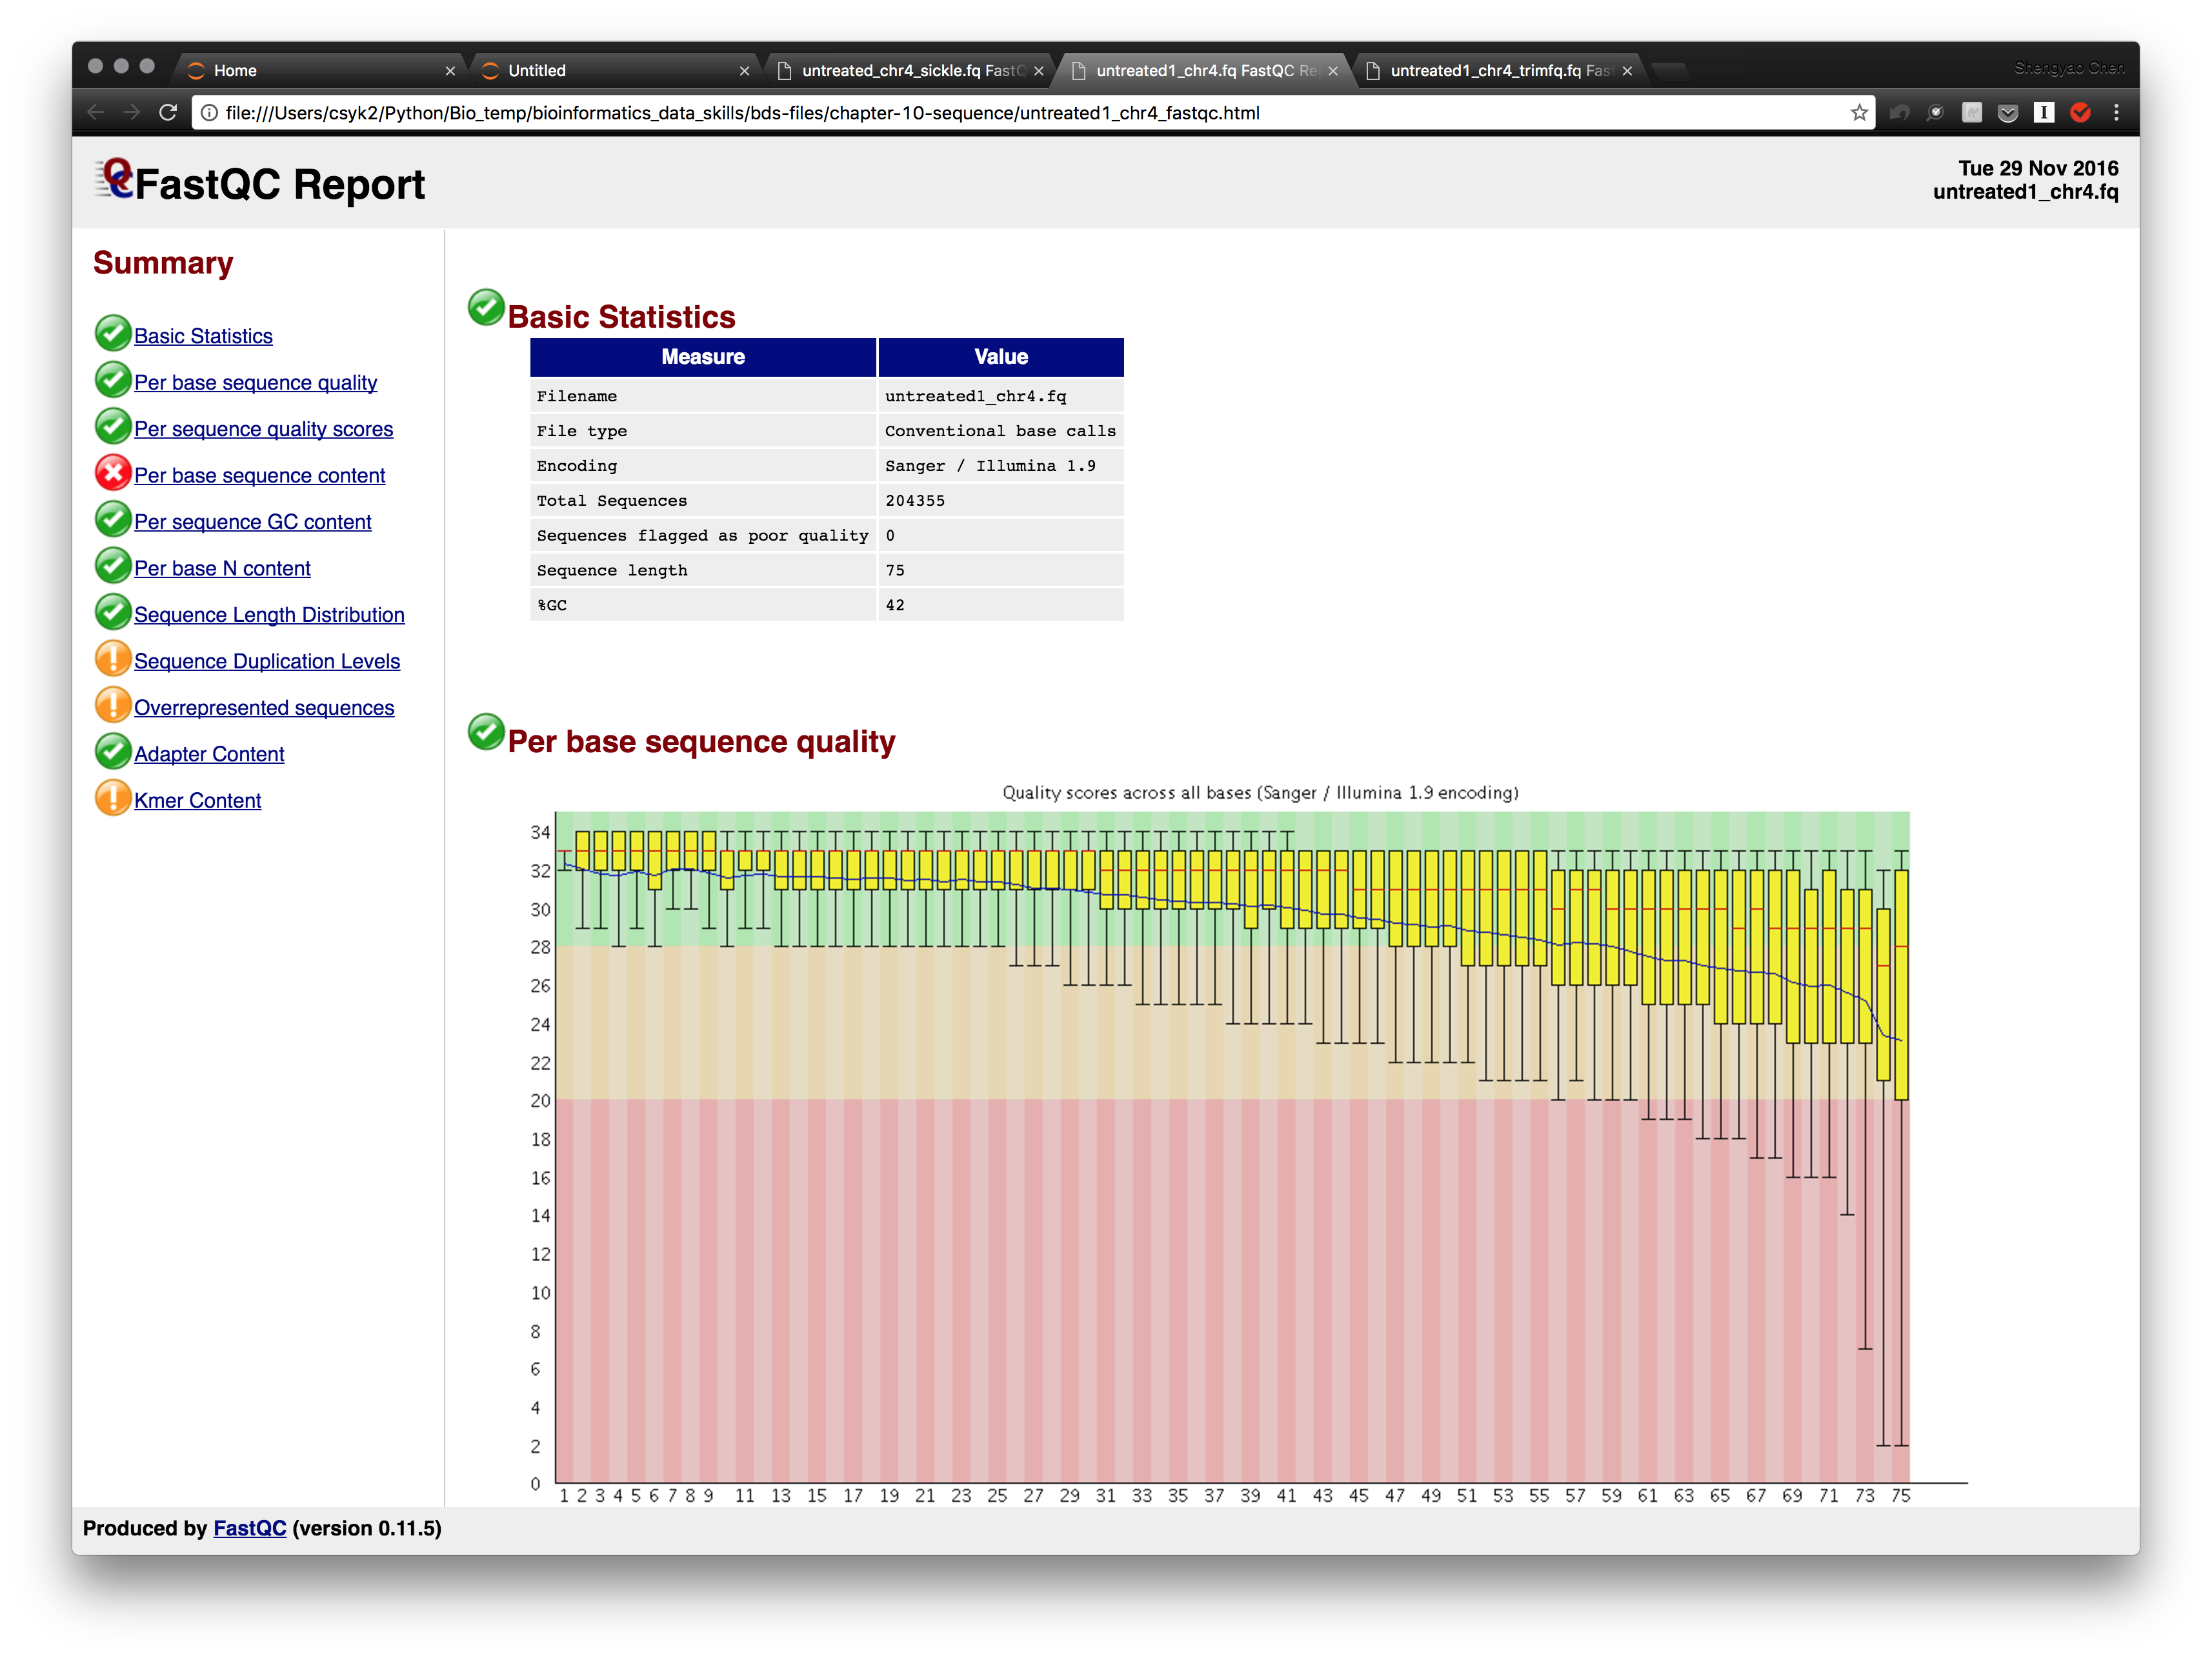

In [13]:
from IPython.display import Image
Image('original.png')

In [19]:
# FastQC result of sickle and trimfq 

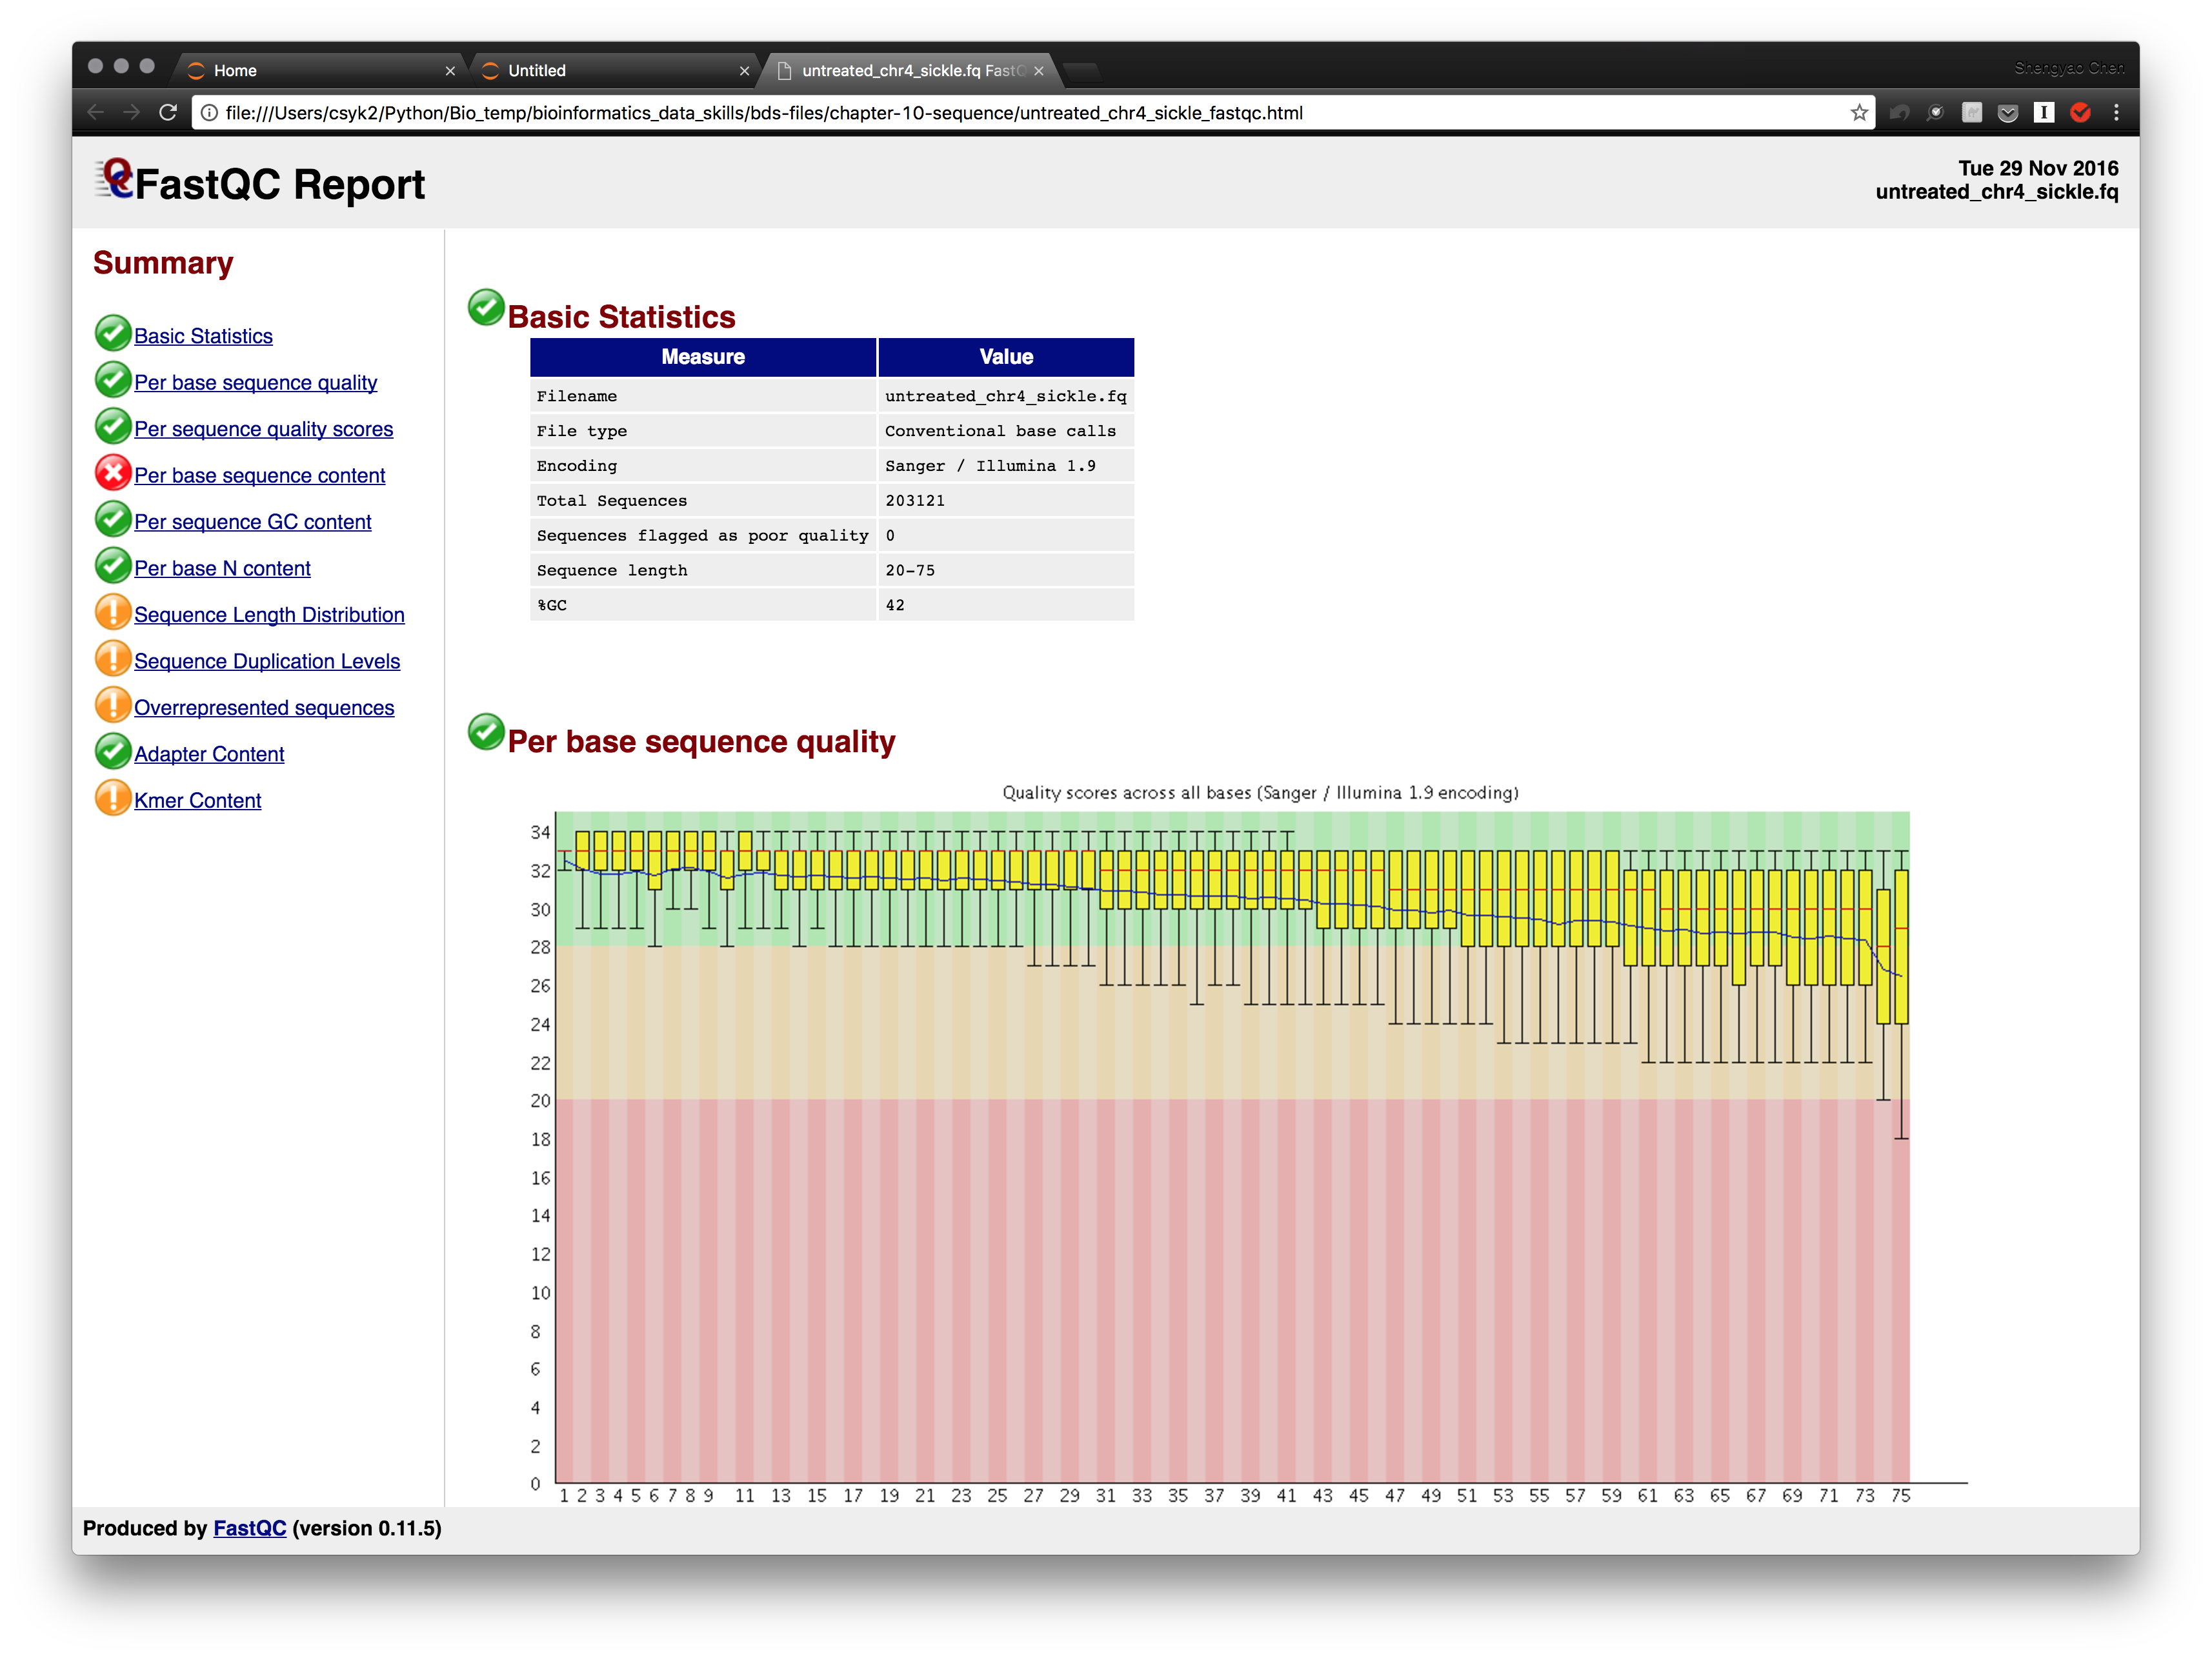

In [15]:
Image('sicke.png')

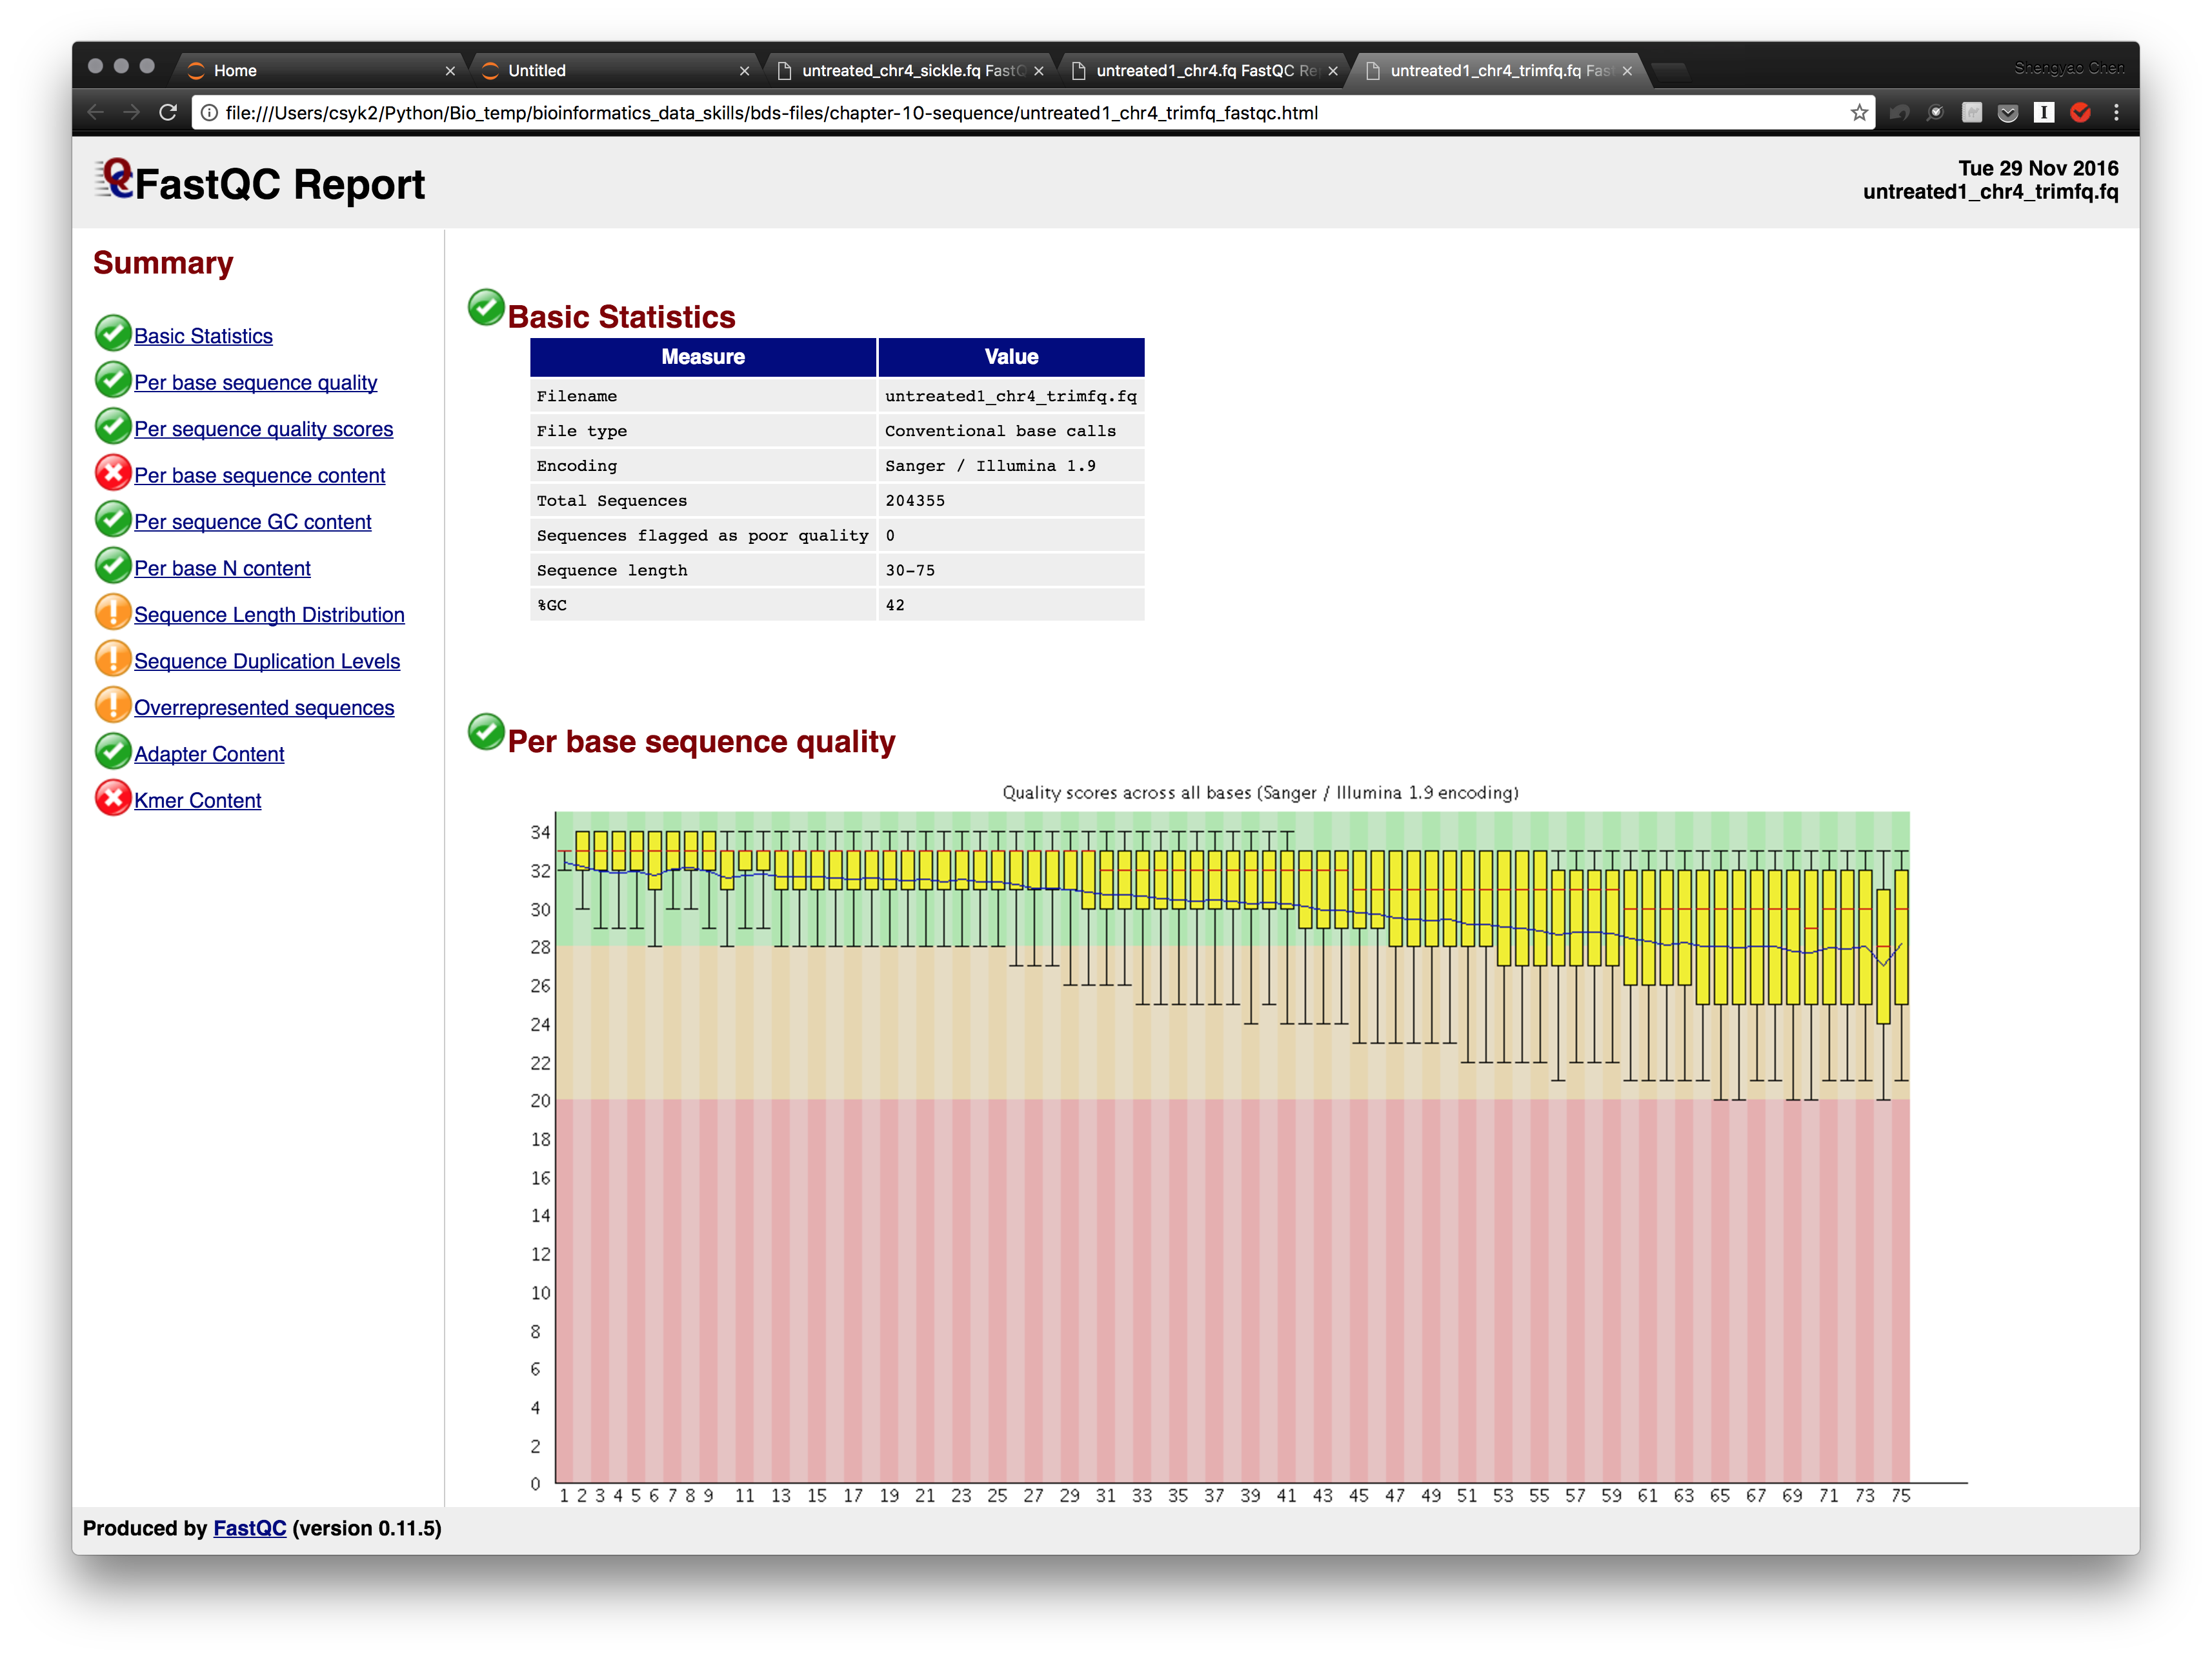

In [14]:
Image('trimfq.png')